In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-stock-price/apple_stock.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/kaggle/input/apple-stock-price/apple_stock.csv')

# Basic info about the dataset
print("Basic Information about the Dataset:")
print(df.info())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Shape of the dataset
print("\nShape of the Dataset:")
print(df.shape)

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2475 non-null   object 
 1   Open       2475 non-null   float64
 2   High       2475 non-null   float64
 3   Low        2475 non-null   float64
 4   Close      2475 non-null   float64
 5   Adj Close  2475 non-null   float64
 6   Volume     2475 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 135.5+ KB
None

Descriptive Statistics:
              Open         High          Low        Close    Adj Close  \
count  2475.000000  2475.000000  2475.000000  2475.000000  2475.000000   
mean     76.004968    76.845661    75.213720    76.064199    74.097124   
std      54.739063    55.389713    54.134658    54.787600    55.248195   
min      17.684999    17.911785    17.626785    17.849285    15.648315   
25%      29.592500    29.841249  

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600


<Axes: xlabel='Close', ylabel='Count'>

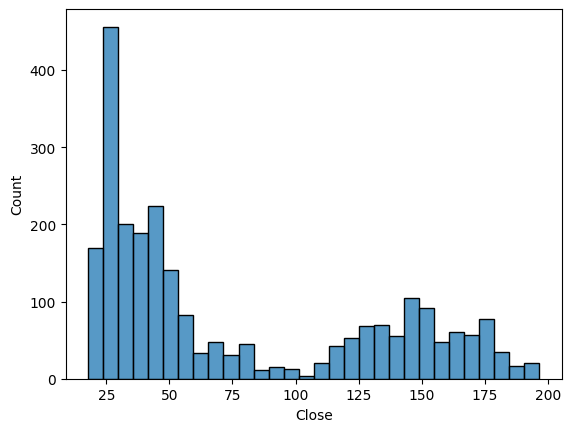

In [5]:
sns.histplot(df['Close'],bins=30)

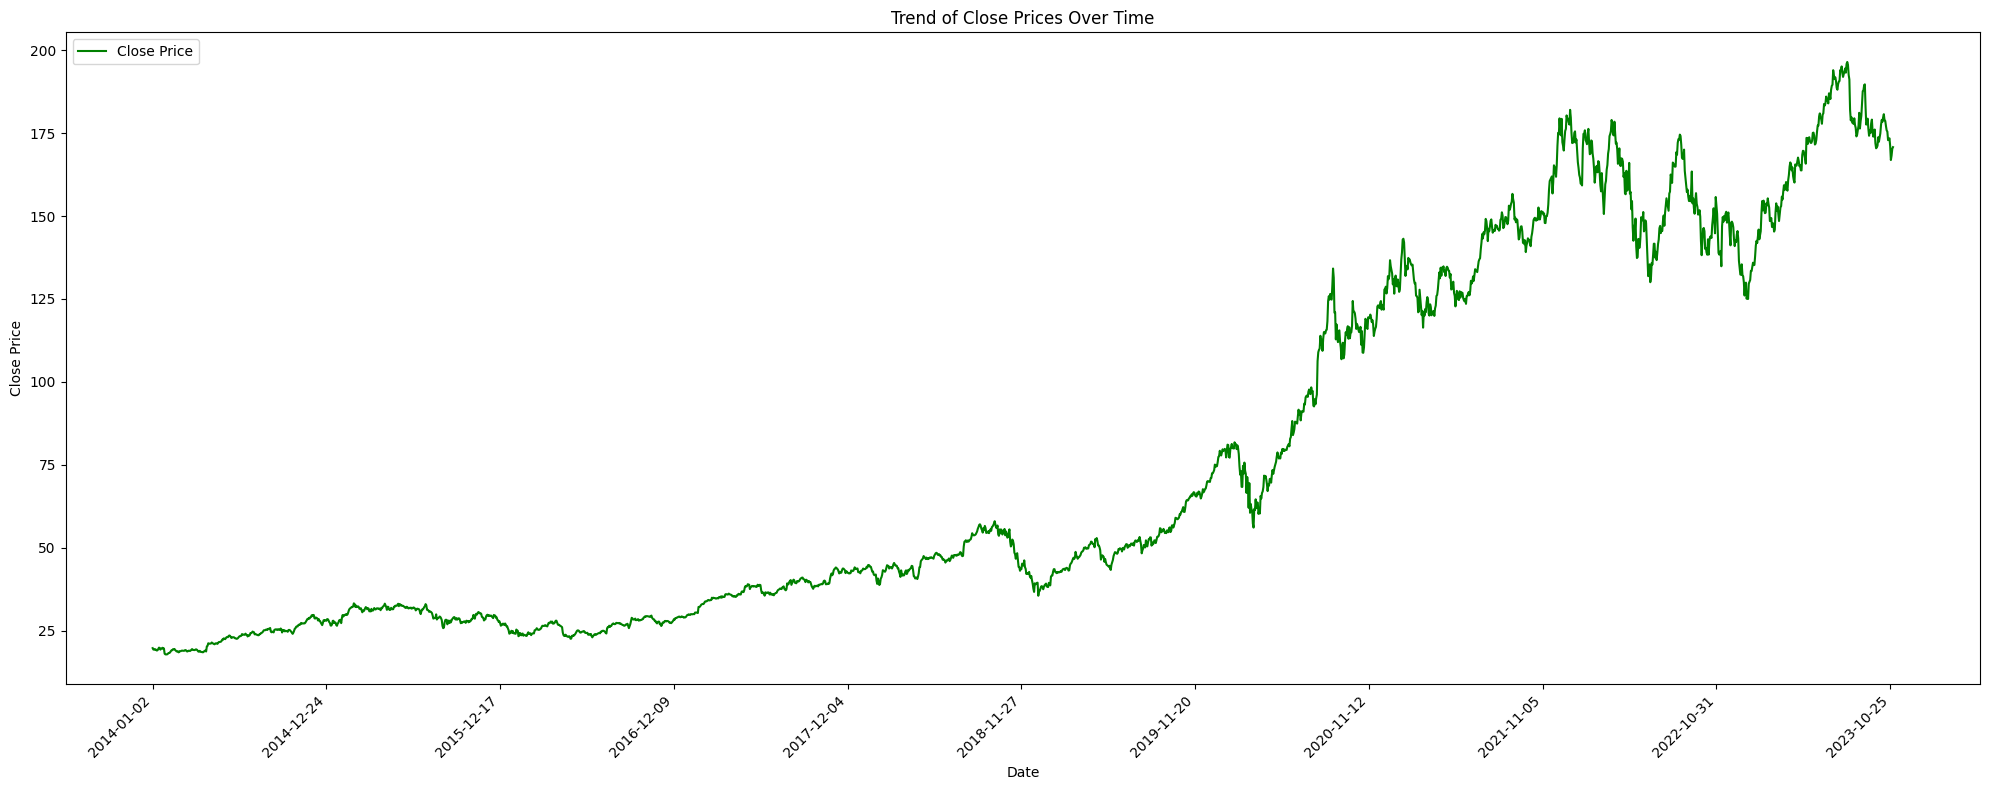

In [6]:
plt.figure(figsize=(20, 8))  # Increase figure size for better visibility
plt.plot(df['Date'], df['Close'], label='Close Price', color='green')
plt.title('Trend of Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Use a subset of dates for better x-axis readability
date_subset = df['Date'].iloc[::int(len(df['Date']) / 10)]  # Adjust the interval as needed
plt.xticks(date_subset, rotation=45, ha='right')  # Rotate and align ticks for better visibility

plt.legend()
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

In [7]:
corr=df["High"].corr(df['Low'])

In [8]:
corr

0.9998105730915471

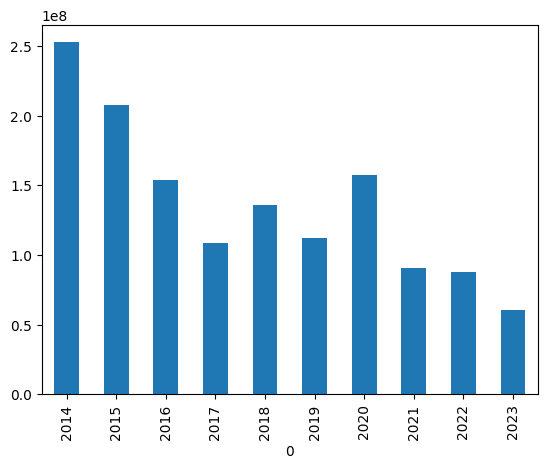

Text(0, 0.5, 'Year')

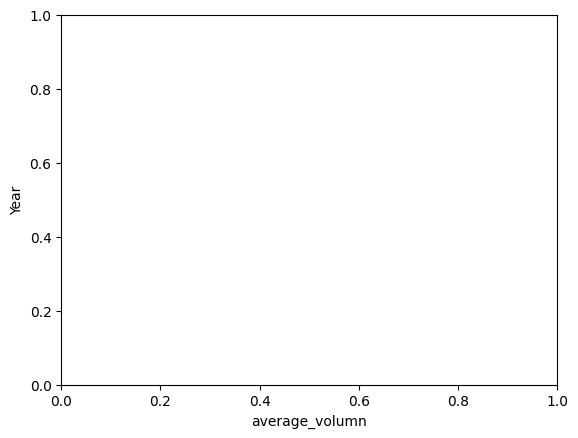

In [9]:
average_volumn=df.groupby(df['Date'].str.extract(r'(\d{4})')[0])["Volume"].mean()
average_volumn
average_volumn.plot(kind="bar")
plt.show()
plt.xlabel("average_volumn")
plt.ylabel("Year")

<Axes: xlabel='Volume'>

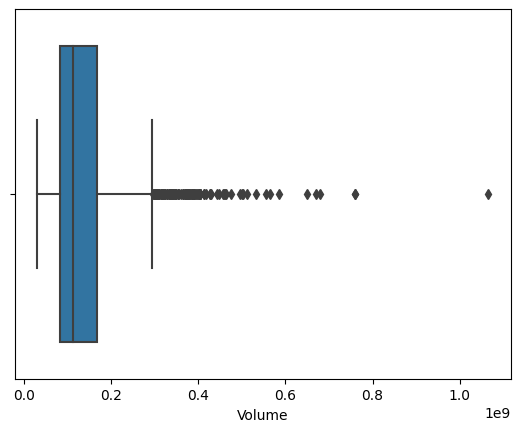

In [10]:
sns.boxplot(x=df["Volume"])

<Axes: xlabel='Month'>

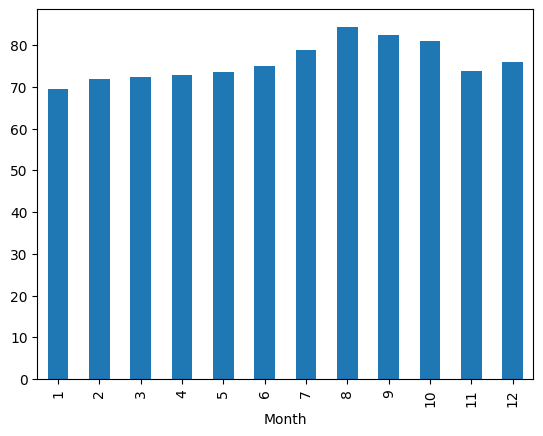

In [11]:
df["Month"]=pd.to_datetime(df["Date"]).dt.month
average_close=df.groupby("Month")["Close"].mean()
average_close.plot(kind='bar')


<Axes: xlabel='Open', ylabel='Close'>

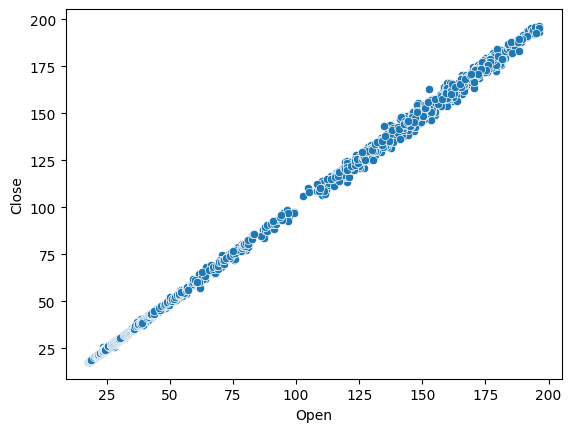

In [12]:
sns.scatterplot(x='Open',y='Close',data=df)

In [13]:
df["Close"]

0        19.754642
1        19.320715
2        19.426071
3        19.287144
4        19.409286
           ...    
2470    171.100006
2471    166.889999
2472    168.220001
2473    170.289993
2474    170.770004
Name: Close, Length: 2475, dtype: float64

In [14]:
df["Adj Close"]

0        17.318729
1        16.938305
2        17.030676
3        16.908880
4        17.015959
           ...    
2470    170.874893
2471    166.670425
2472    167.998672
2473    170.065933
2474    170.545319
Name: Adj Close, Length: 2475, dtype: float64

In [15]:
c=df["Close"].corr(df["Adj Close"])
c

0.9999637975301106

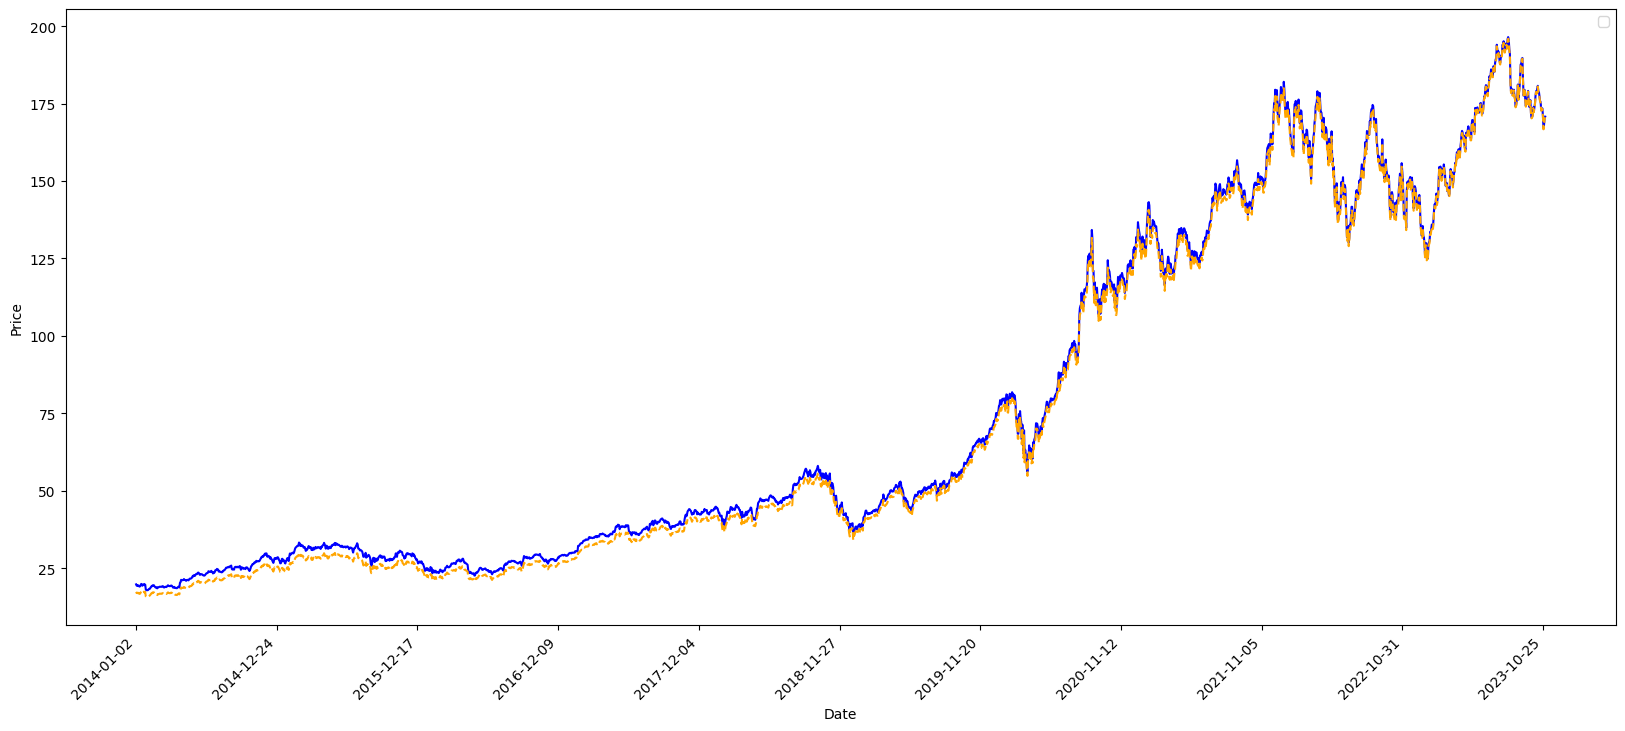

In [16]:
plt.figure(figsize=(20,8))
plt.plot(df['Date'],df['Close'],color='blue')
plt.plot(df['Date'],df['Adj Close'],color='orange',linestyle='dashed')
date_subset = df['Date'].iloc[::int(len(df['Date']) / 10)]  # Adjust the interval as needed
plt.xticks(date_subset, rotation=45, ha='right')  # Rotate and align ticks for better visibility

plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)



KeyError: 'Date'

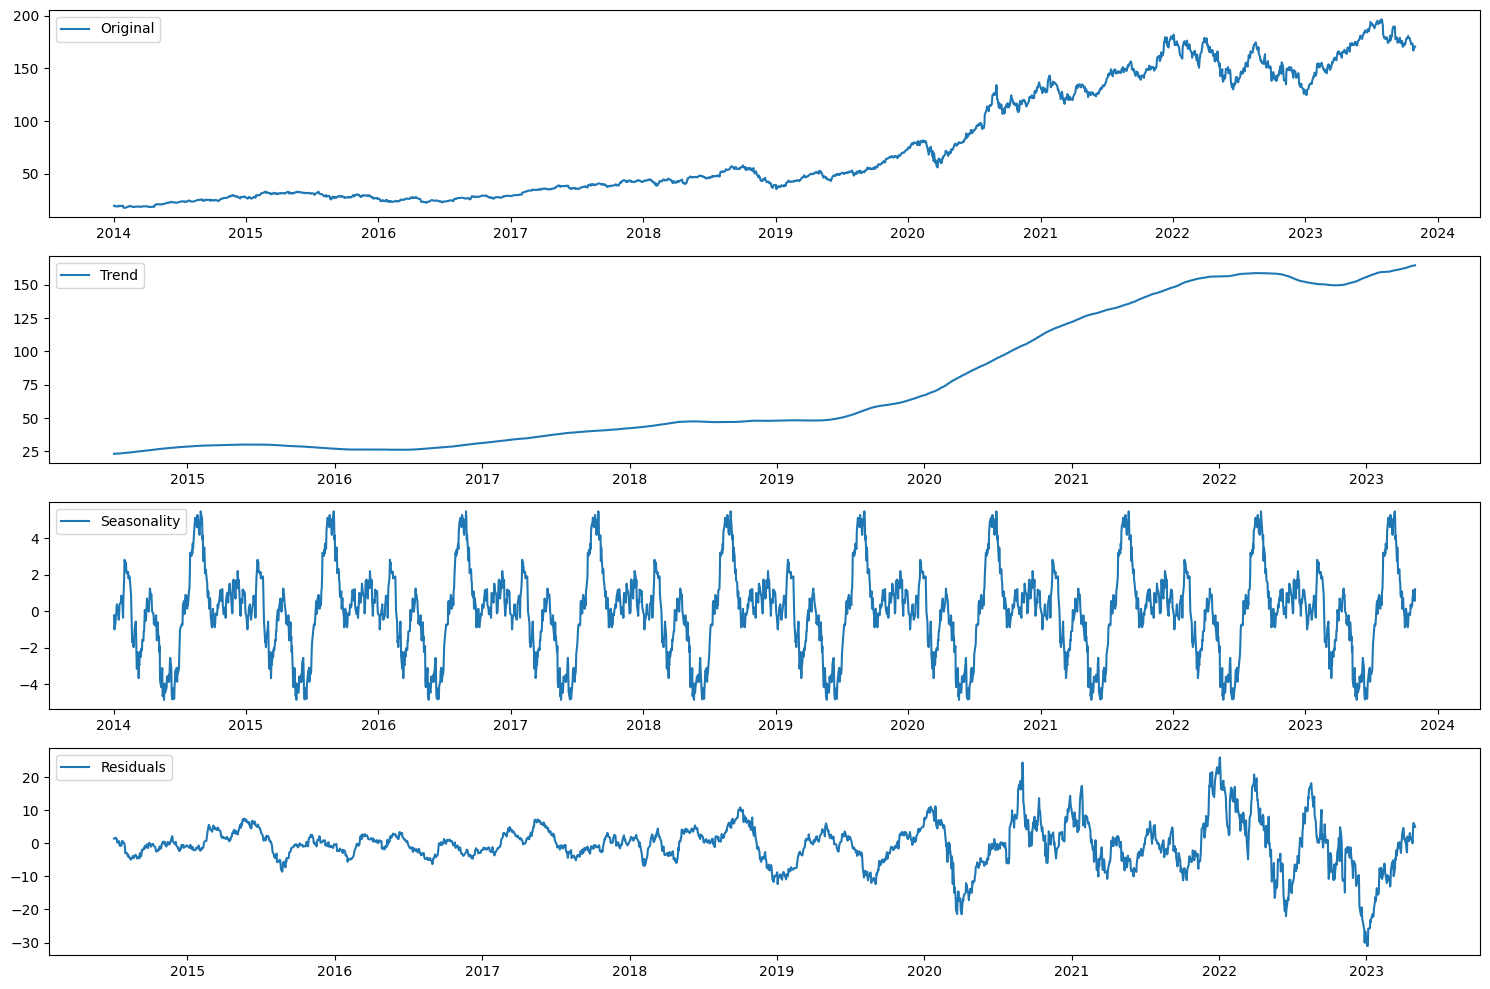

In [29]:
plt.figure(figsize=(15,10))
decomposition=seasonal_decompose(df['Close'],period=252)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(4, 1, 1)
plt.plot(df['Close'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [43]:
df=pd.read_csv('/kaggle/input/apple-stock-price/apple_stock.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600


In [44]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2.475000e+03
mean,76.004968,76.845661,75.213720,76.064199,74.097124,1.380565e+08
std,54.739063,55.389713,54.134658,54.787600,55.248195,8.399674e+07
min,17.684999,17.911785,17.626785,17.849285,15.648315,3.145820e+07
25%,29.592500,29.841249,29.371249,29.707500,27.131330,8.300500e+07
50%,47.507500,47.967499,47.267502,47.599998,45.507229,1.134760e+08
75%,132.145004,133.680000,130.495003,132.029999,130.403320,1.682138e+08
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.065523e+09


In [45]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Axes: >

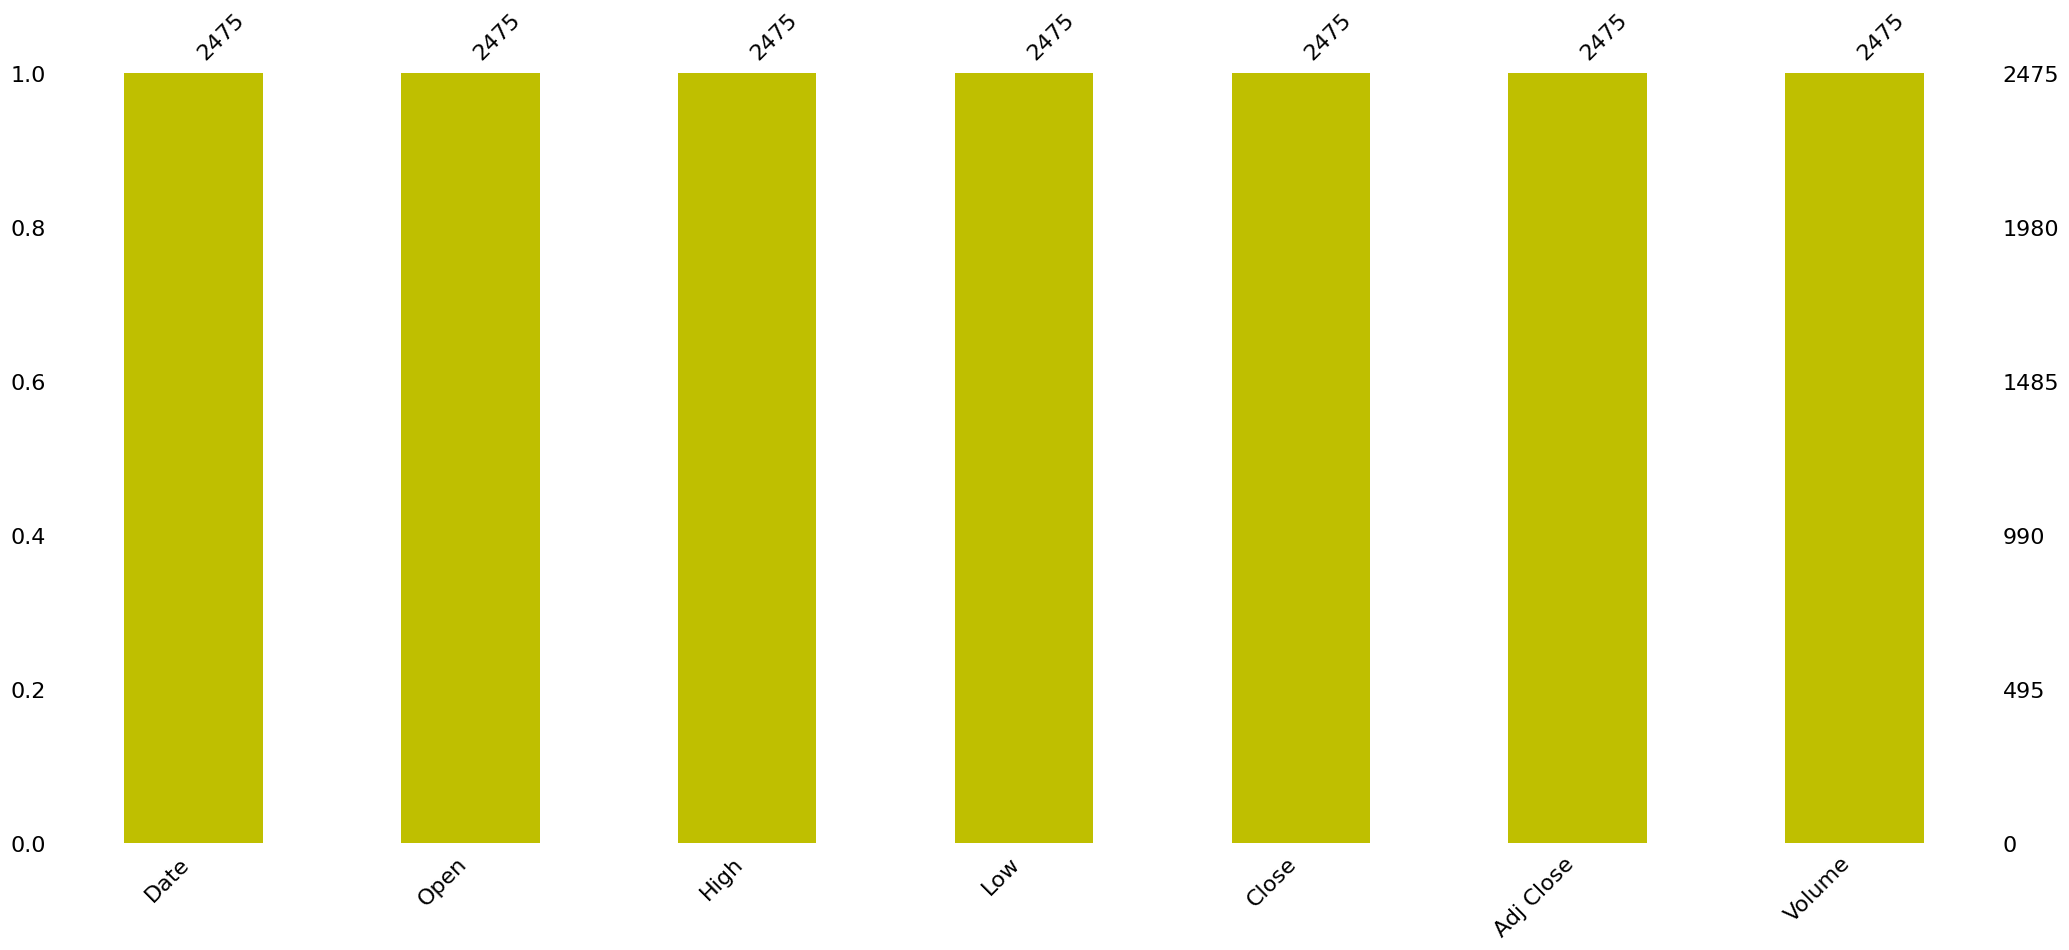

In [46]:
import missingno as msno
msno.bar(df,color='y')

In [47]:
df.duplicated().sum()

0

In [48]:
df['Date']=pd.to_datetime(df['Date'])
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day
df['Day of week']=df['Date'].dt.day_name()

In [49]:
Min_Date=df['Date'].min().date()
Min_Date

datetime.date(2014, 1, 2)

In [50]:
Max_Date=df['Date'].max().date()
Max_Date

datetime.date(2023, 10, 31)

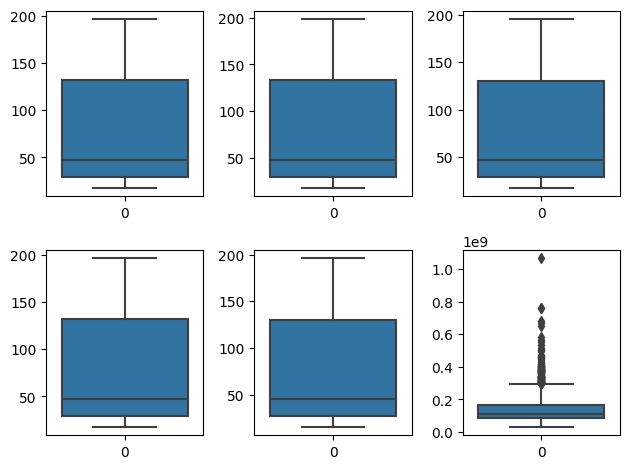

In [51]:
columns_for_boxplot=['Close','High','Low','Open','Adj Close','Volume']
for i,col in enumerate (columns_for_boxplot,1):
    plt.subplot(2,3,i)
    sns.boxplot(df[col])

plt.tight_layout()
plt.show()    

<Axes: >

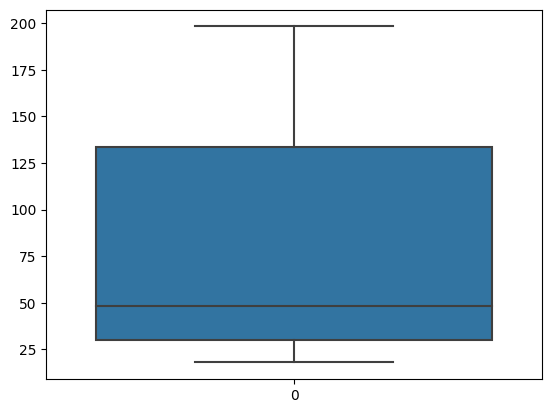

In [52]:
sns.boxplot(df['High'])

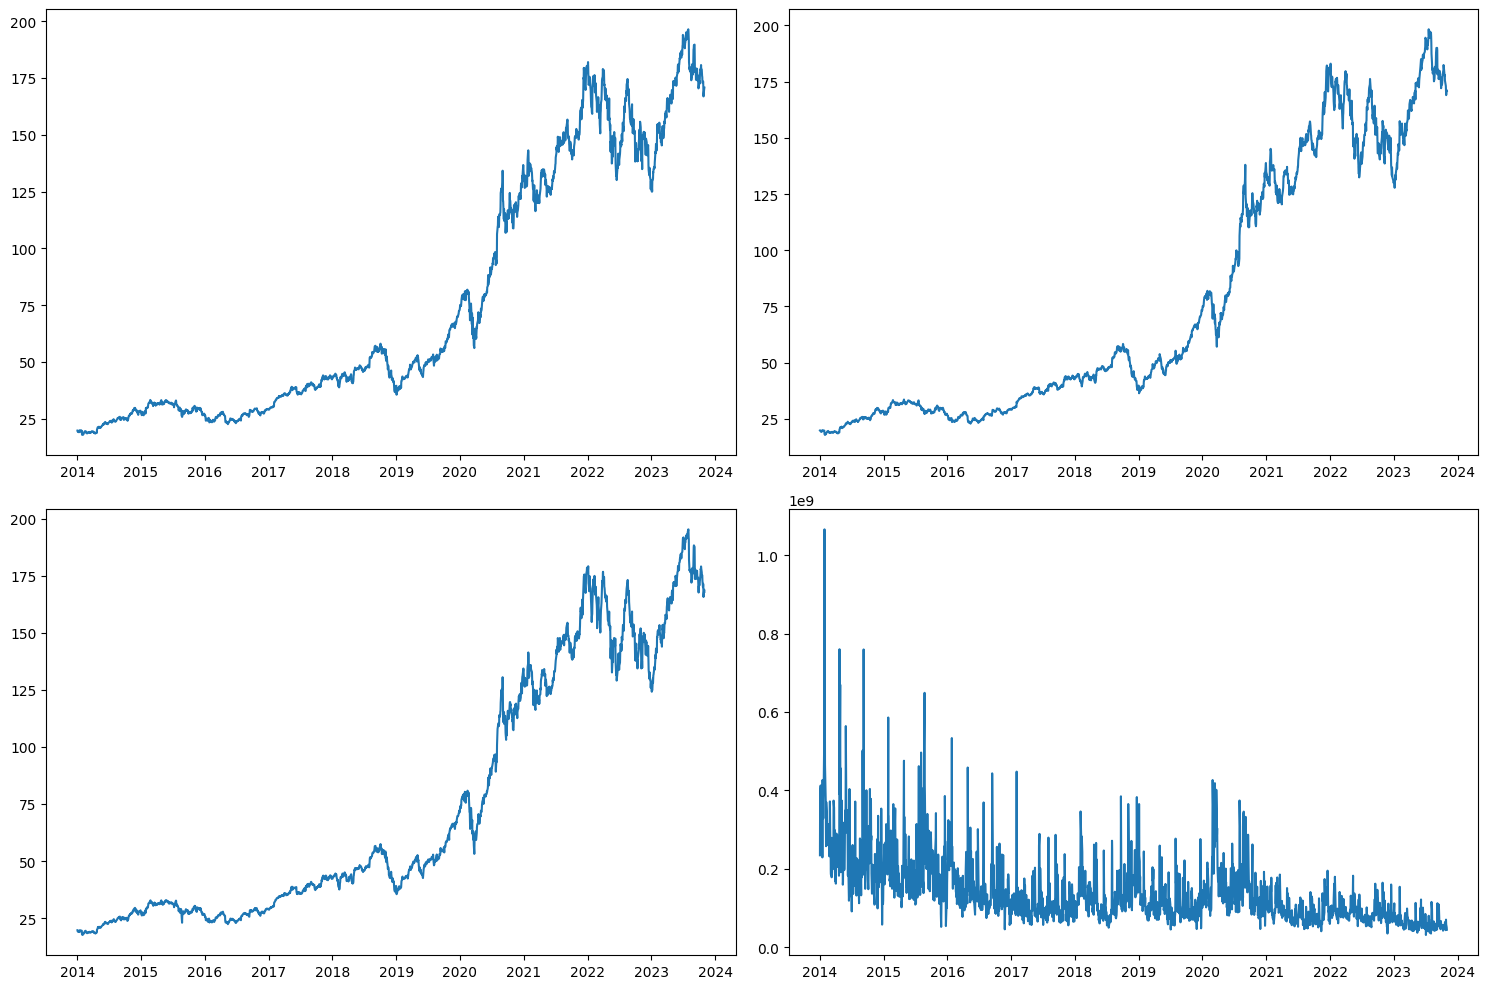

In [53]:
f,axes=plt.subplots(2,2,figsize=(15,10))
axes[0,0].plot(df['Date'],df['Close'])
axes[0,1].plot(df['Date'],df['High'])
axes[1,0].plot(df['Date'],df['Low'])
axes[1,1].plot(df['Date'],df['Volume'])
plt.tight_layout()
plt.show()

In [54]:
df['Day of week']

0        Thursday
1          Friday
2          Monday
3         Tuesday
4       Wednesday
          ...    
2470    Wednesday
2471     Thursday
2472       Friday
2473       Monday
2474      Tuesday
Name: Day of week, Length: 2475, dtype: object

In [55]:
df['year']

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
2470    2023
2471    2023
2472    2023
2473    2023
2474    2023
Name: year, Length: 2475, dtype: int32

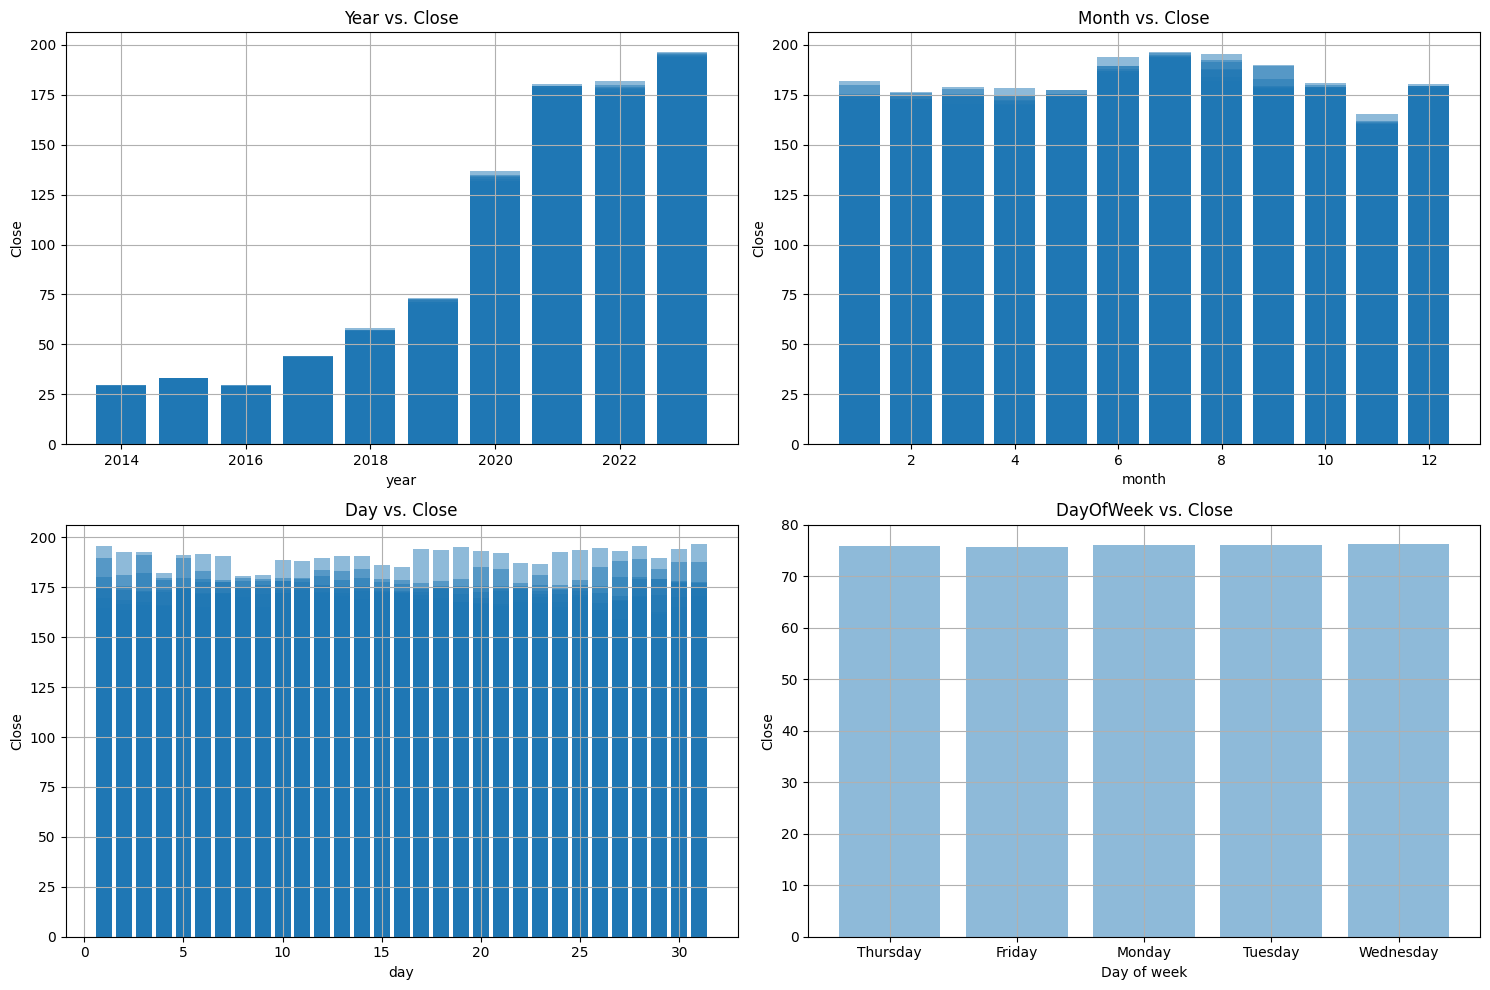

In [56]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
variables = ['year', 'month', 'day', 'Day of week']  
titles = ['Year vs. Close', 'Month vs. Close', 'Day vs. Close', 'DayOfWeek vs. Close']

for i, ax in enumerate(axs.flat):
    if variables[i] == 'Day of week':
        ax.bar(df[variables[i]].unique(), df.groupby(variables[i])['Close'].mean(), alpha=0.5)
    else:
        ax.bar(df[variables[i]], df['Close'], alpha=0.5)

    ax.set_title(titles[i])
    ax.set_xlabel(variables[i])
    ax.set_ylabel('Close')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [57]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from prophet.plot import plot, plot_components
from prophet.plot import plot_cross_validation_metric
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [58]:
df=pd.DataFrame({
    'ds':df['Date'],
    'y':df['Close']
})

In [59]:
df

,ds,y
0,2014-01-02,19.754642
1,2014-01-03,19.320715
2,2014-01-06,19.426071
3,2014-01-07,19.287144
4,2014-01-08,19.409286
...,...,...
2470,2023-10-25,171.100006
2471,2023-10-26,166.889999
2472,2023-10-27,168.220001
2473,2023-10-30,170.289993


In [60]:
model=Prophet()

In [61]:
model.fit(df)

05:16:03 - cmdstanpy - INFO - Chain [1] start processing
05:16:04 - cmdstanpy - INFO - Chain [1] done processing


In [62]:
future=model.make_future_dataframe(periods=364)

In [63]:
future

,ds
0,2014-01-02
1,2014-01-03
2,2014-01-06
3,2014-01-07
4,2014-01-08
...,...
2834,2024-10-25
2835,2024-10-26
2836,2024-10-27
2837,2024-10-28


In [64]:
forecast=model.predict(future)

In [65]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-02,18.886113,7.435139,26.942389,18.886113,18.886113,-0.842630,-0.842630,-0.842630,-0.201522,-0.201522,-0.201522,-0.641109,-0.641109,-0.641109,0.0,0.0,0.0,18.043483
1,2014-01-03,18.911983,8.026935,28.202122,18.911983,18.911983,-0.982986,-0.982986,-0.982986,-0.289409,-0.289409,-0.289409,-0.693577,-0.693577,-0.693577,0.0,0.0,0.0,17.928997
2,2014-01-06,18.989592,8.678884,27.839901,18.989592,18.989592,-0.885955,-0.885955,-0.885955,-0.016653,-0.016653,-0.016653,-0.869302,-0.869302,-0.869302,0.0,0.0,0.0,18.103637
3,2014-01-07,19.015462,8.352116,28.075095,19.015462,19.015462,-1.087157,-1.087157,-1.087157,-0.156916,-0.156916,-0.156916,-0.930241,-0.930241,-0.930241,0.0,0.0,0.0,17.928304
4,2014-01-08,19.041331,8.599622,28.538160,19.041331,19.041331,-1.108575,-1.108575,-1.108575,-0.118481,-0.118481,-0.118481,-0.990094,-0.990094,-0.990094,0.0,0.0,0.0,17.932757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2834,2024-10-25,180.012801,166.080465,192.359866,170.837403,189.051131,-0.732093,-0.732093,-0.732093,-0.289409,-0.289409,-0.289409,-0.442684,-0.442684,-0.442684,0.0,0.0,0.0,179.280709
2835,2024-10-26,180.038651,167.228200,193.217458,170.813742,189.116051,-0.107855,-0.107855,-0.107855,0.391490,0.391490,0.391490,-0.499345,-0.499345,-0.499345,0.0,0.0,0.0,179.930796
2836,2024-10-27,180.064500,166.840217,192.741655,170.790081,189.182829,-0.168886,-0.168886,-0.168886,0.391491,0.391491,0.391491,-0.560377,-0.560377,-0.560377,0.0,0.0,0.0,179.895614
2837,2024-10-28,180.090349,165.564398,193.461997,170.766420,189.248440,-0.640984,-0.640984,-0.640984,-0.016653,-0.016653,-0.016653,-0.624332,-0.624332,-0.624332,0.0,0.0,0.0,179.449365


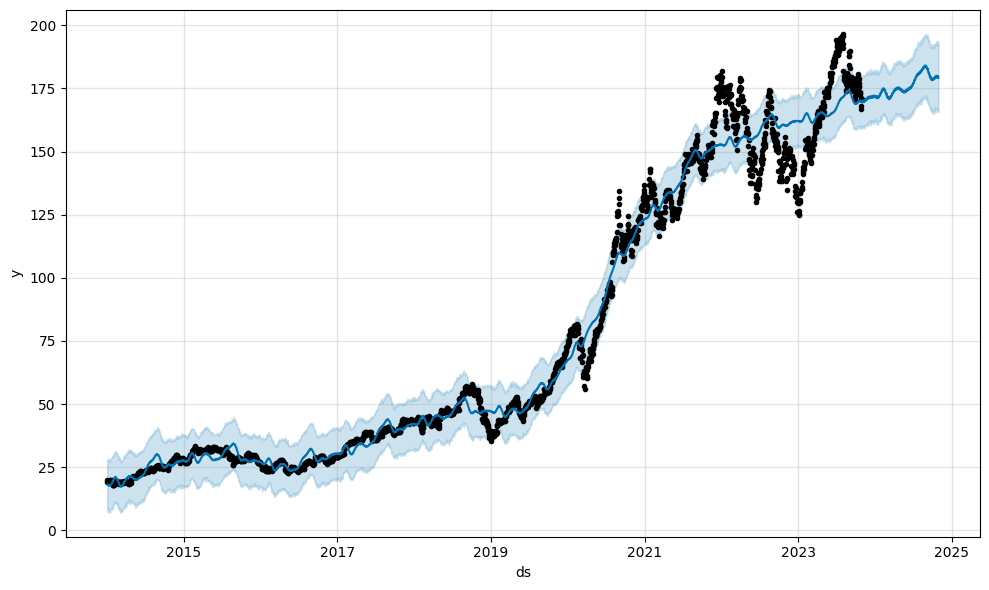

In [66]:
fig=model.plot(forecast)

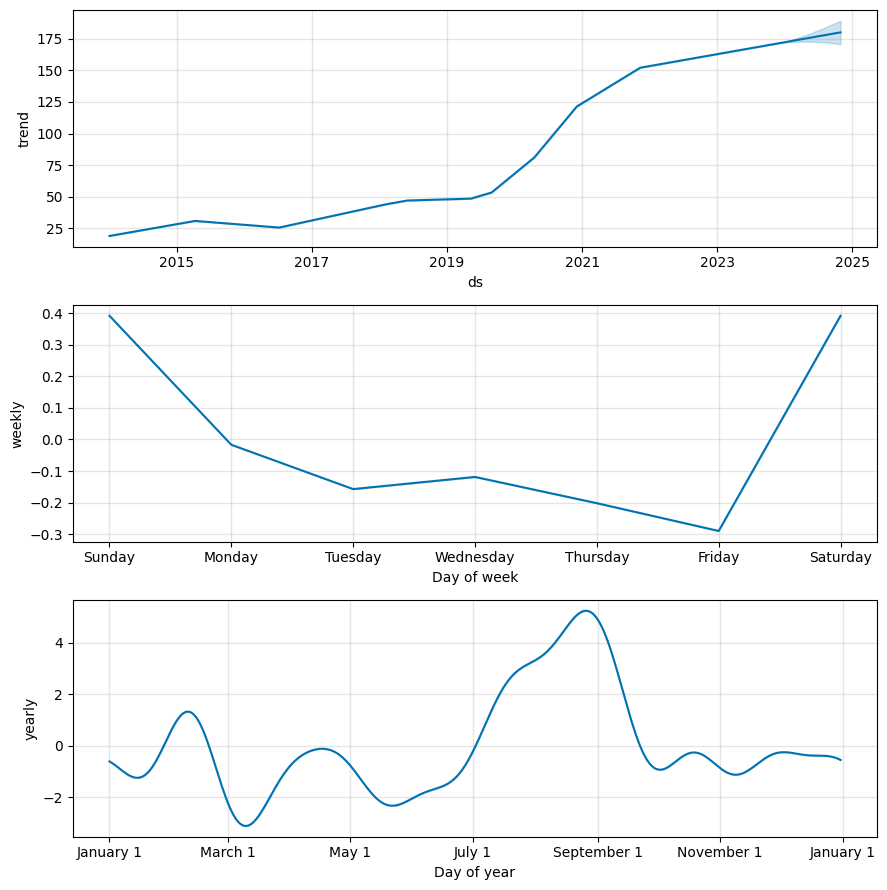

In [67]:
fig_components=model.plot_components(forecast)

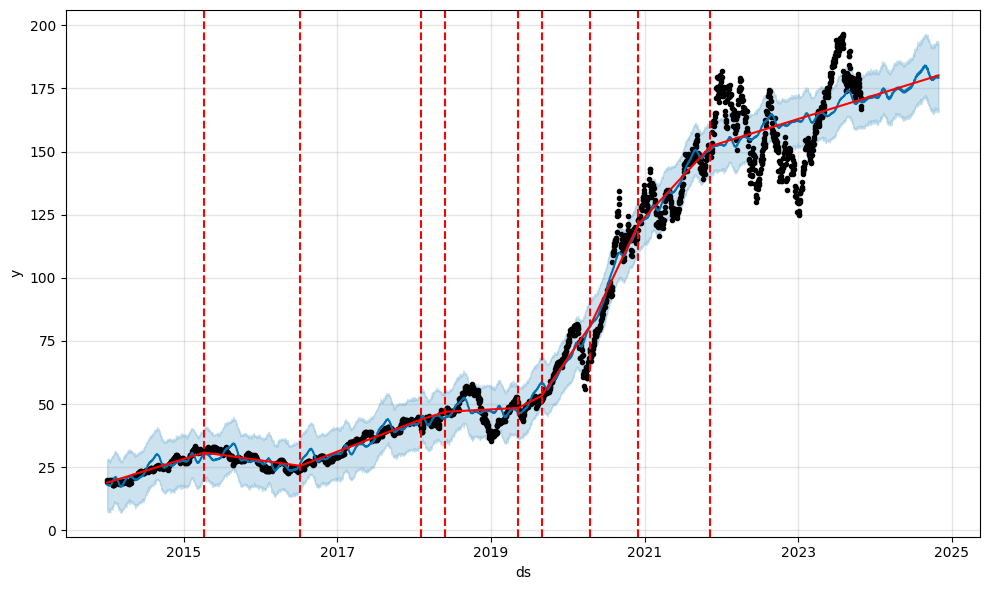

In [68]:
fig=model.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),model,forecast)

In [69]:
model.changepoints

79     2014-04-28
158    2014-08-19
237    2014-12-10
317    2015-04-08
396    2015-07-30
475    2015-11-19
554    2016-03-16
633    2016-07-08
712    2016-10-28
792    2017-02-24
871    2017-06-19
950    2017-10-10
1029   2018-02-02
1108   2018-05-29
1187   2018-09-19
1267   2019-01-15
1346   2019-05-09
1425   2019-08-30
1504   2019-12-23
1583   2020-04-17
1662   2020-08-10
1742   2020-12-02
1821   2021-03-29
1900   2021-07-21
1979   2021-11-10
Name: ds, dtype: datetime64[ns]

,ds,y
0,2014-01-02,19.754642
1,2014-01-03,19.320715
2,2014-01-06,19.426071
3,2014-01-07,19.287144
4,2014-01-08,19.409286
...,...,...
2470,2023-10-25,171.100006
2471,2023-10-26,166.889999
2472,2023-10-27,168.220001
2473,2023-10-30,170.289993


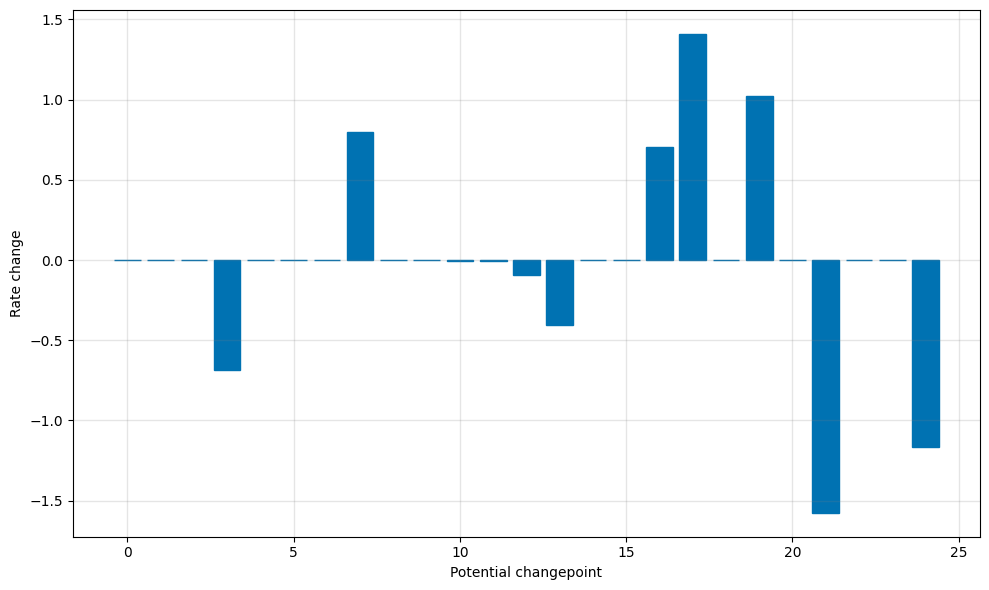

In [84]:
deltas = model.params['delta'].mean(0)
fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas, facecolor='#0072B2', edgecolor='#0072B2')
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('Potential changepoint')
fig.tight_layout()

06:12:04 - cmdstanpy - INFO - Chain [1] start processing
06:12:05 - cmdstanpy - INFO - Chain [1] done processing


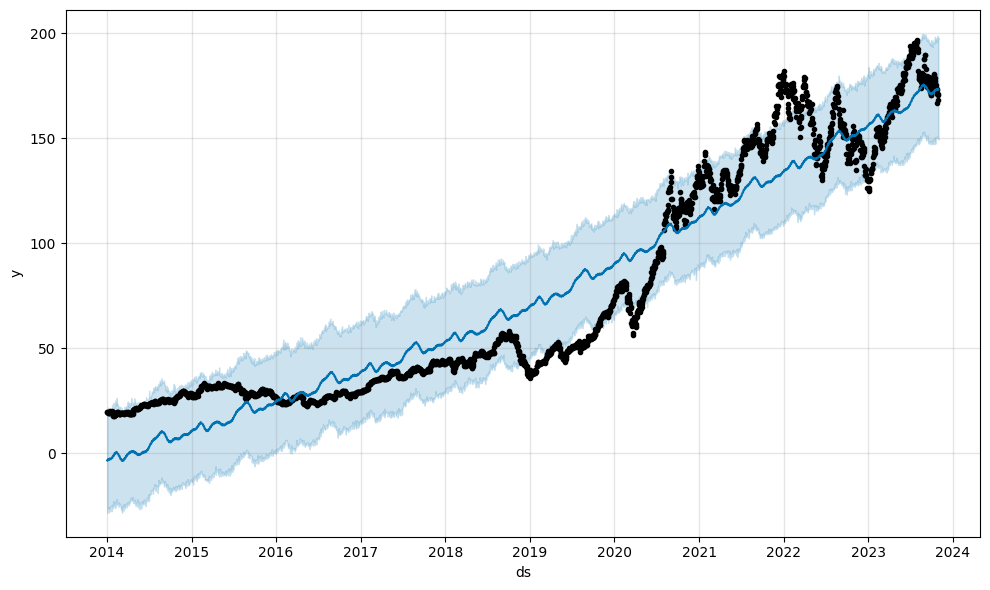

In [113]:
m=Prophet(changepoint_prior_scale=0.001)
forecast=m.fit(df).predict(df)
fig=m.plot(forecast)

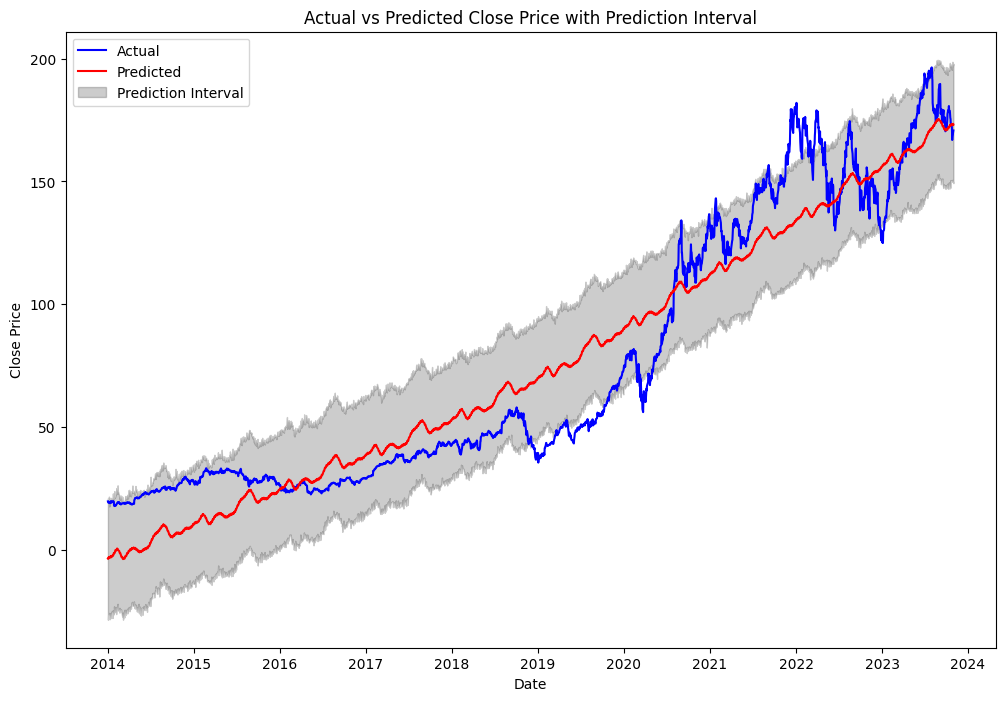

In [114]:
plt.figure(figsize=(12, 8))  # Set figure size here
plt.plot(df['ds'], df['y'], label='Actual', color='blue')

plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='black', alpha=0.2, label='Prediction Interval')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price with Prediction Interval')
plt.legend()

plt.show()

In [115]:
m=Prophet(seasonality_mode='multiplicative',yearly_seasonality=2)
m.add_country_holidays(country_name='US')
m.fit(df)

06:12:07 - cmdstanpy - INFO - Chain [1] start processing
06:12:12 - cmdstanpy - INFO - Chain [1] done processing


In [116]:
m.train_holiday_names

0                                      New Year's Day
1                          Martin Luther King Jr. Day
2                               Washington's Birthday
3                                        Memorial Day
4                                    Independence Day
5                                           Labor Day
6                                        Columbus Day
7                                        Veterans Day
8                                        Thanksgiving
9                                       Christmas Day
10                           Christmas Day (Observed)
11                          New Year's Day (Observed)
12                            Veterans Day (Observed)
13                        Independence Day (Observed)
14               Juneteenth National Independence Day
15    Juneteenth National Independence Day (Observed)
dtype: object

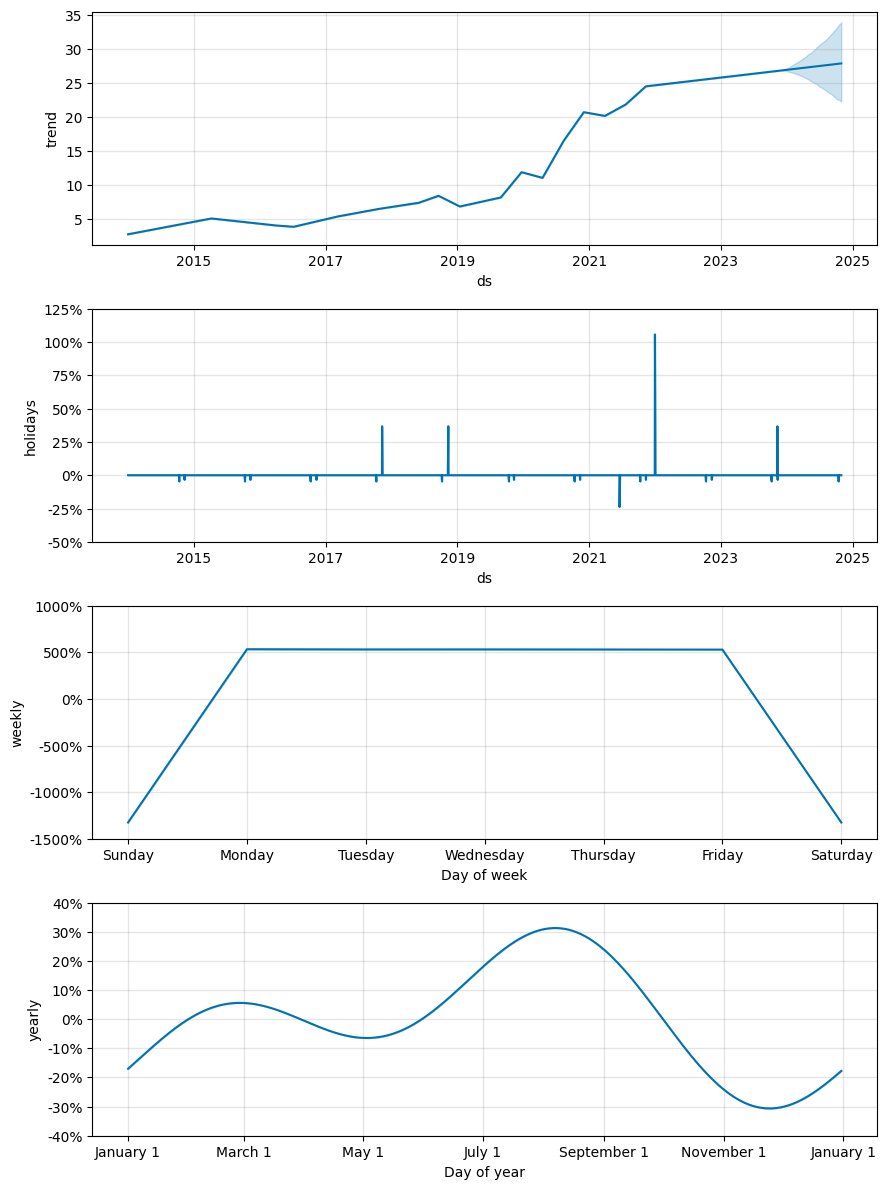

In [117]:
forecast=m.predict(future)
fig=m.plot_components(forecast)

In [118]:
df_cv=cross_validation(model,initial='730 days',horizon='365 days',period='180 days')
df_p=performance_metrics(df_cv)

mae=df_p['mae'].values[0]
rmse=df_p['rmse'].values[0]

  0%|          | 0/14 [00:00<?, ?it/s]

06:12:15 - cmdstanpy - INFO - Chain [1] start processing
06:12:15 - cmdstanpy - INFO - Chain [1] done processing
06:12:16 - cmdstanpy - INFO - Chain [1] start processing
06:12:16 - cmdstanpy - INFO - Chain [1] done processing
06:12:17 - cmdstanpy - INFO - Chain [1] start processing
06:12:17 - cmdstanpy - INFO - Chain [1] done processing
06:12:18 - cmdstanpy - INFO - Chain [1] start processing
06:12:18 - cmdstanpy - INFO - Chain [1] done processing
06:12:19 - cmdstanpy - INFO - Chain [1] start processing
06:12:19 - cmdstanpy - INFO - Chain [1] done processing
06:12:20 - cmdstanpy - INFO - Chain [1] start processing
06:12:20 - cmdstanpy - INFO - Chain [1] done processing
06:12:22 - cmdstanpy - INFO - Chain [1] start processing
06:12:22 - cmdstanpy - INFO - Chain [1] done processing
06:12:23 - cmdstanpy - INFO - Chain [1] start processing
06:12:23 - cmdstanpy - INFO - Chain [1] done processing
06:12:24 - cmdstanpy - INFO - Chain [1] start processing
06:12:24 - cmdstanpy - INFO - Chain [1]

In [119]:
mae

8.663254934014867

In [120]:
rmse

12.411021054543268

In [121]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-06-06,24.832940,23.838269,25.901633,24.657499,2016-06-04
1,2016-06-07,24.720312,23.706450,25.854166,24.757500,2016-06-04
2,2016-06-08,24.662328,23.613846,25.682453,24.735001,2016-06-04
3,2016-06-09,24.560316,23.536207,25.566313,24.912500,2016-06-04
4,2016-06-10,24.471945,23.493403,25.475842,24.707500,2016-06-04


In [122]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
3516,2023-10-25,182.956785,168.952113,198.359829,171.100006,2022-10-31
3517,2023-10-26,183.033504,169.717537,197.406500,166.889999,2022-10-31
3518,2023-10-27,183.117646,169.167506,198.494464,168.220001,2022-10-31
3519,2023-10-30,183.871826,169.829277,199.101259,170.289993,2022-10-31
3520,2023-10-31,184.101029,169.411086,198.466774,170.770004,2022-10-31


In [123]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,154.033444,12.411021,8.663255,0.099218,0.067768,0.095815,0.349432
1,38 days,156.690443,12.517605,8.759481,0.100415,0.069050,0.097140,0.342614
2,39 days,157.284353,12.541306,8.754051,0.100027,0.068774,0.096806,0.338068
3,40 days,162.808400,12.759639,8.913548,0.102416,0.071101,0.099122,0.326705
4,41 days,167.155234,12.928853,9.025884,0.103782,0.072319,0.100594,0.319318


In [124]:
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
324,361 days,832.109922,28.846316,21.977967,0.227962,0.205579,0.259475,0.316919
325,362 days,841.864844,29.014907,22.160423,0.229762,0.207890,0.261000,0.307955
326,363 days,848.716136,29.132733,22.247888,0.230754,0.209775,0.262102,0.303125
327,364 days,841.471208,29.008123,22.124099,0.228898,0.205798,0.259348,0.303030
328,365 days,836.073602,28.914937,22.070622,0.228393,0.204616,0.259045,0.301705


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as ex

In [3]:
df=pd.read_csv('/kaggle/input/apple-stock-price/apple_stock.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600


In [4]:
df.shape

(2475, 7)

In [5]:
df.info

<bound method DataFrame.info of             Date        Open        High         Low       Close   Adj Close  \
0     2014-01-02   19.845715   19.893929   19.715000   19.754642   17.318729   
1     2014-01-03   19.745001   19.775000   19.301071   19.320715   16.938305   
2     2014-01-06   19.194643   19.528570   19.057142   19.426071   17.030676   
3     2014-01-07   19.440001   19.498571   19.211430   19.287144   16.908880   
4     2014-01-08   19.243214   19.484285   19.238930   19.409286   17.015959   
...          ...         ...         ...         ...         ...         ...   
2470  2023-10-25  171.880005  173.059998  170.649994  171.100006  170.874893   
2471  2023-10-26  170.369995  171.380005  165.669998  166.889999  166.670425   
2472  2023-10-27  166.910004  168.960007  166.830002  168.220001  167.998672   
2473  2023-10-30  169.020004  171.169998  168.869995  170.289993  170.065933   
2474  2023-10-31  169.350006  170.899994  167.899994  170.770004  170.545319   

       

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2.475000e+03
mean,76.004968,76.845661,75.213720,76.064199,74.097124,1.380565e+08
std,54.739063,55.389713,54.134658,54.787600,55.248195,8.399674e+07
min,17.684999,17.911785,17.626785,17.849285,15.648315,3.145820e+07
25%,29.592500,29.841249,29.371249,29.707500,27.131330,8.300500e+07
50%,47.507500,47.967499,47.267502,47.599998,45.507229,1.134760e+08
75%,132.145004,133.680000,130.495003,132.029999,130.403320,1.682138e+08
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.065523e+09


In [7]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2475 non-null   datetime64[ns]
 1   Open       2475 non-null   float64       
 2   High       2475 non-null   float64       
 3   Low        2475 non-null   float64       
 4   Close      2475 non-null   float64       
 5   Adj Close  2475 non-null   float64       
 6   Volume     2475 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 135.5 KB


In [10]:
fig=ex.line(df,x='Date',y='Close')
fig.show()

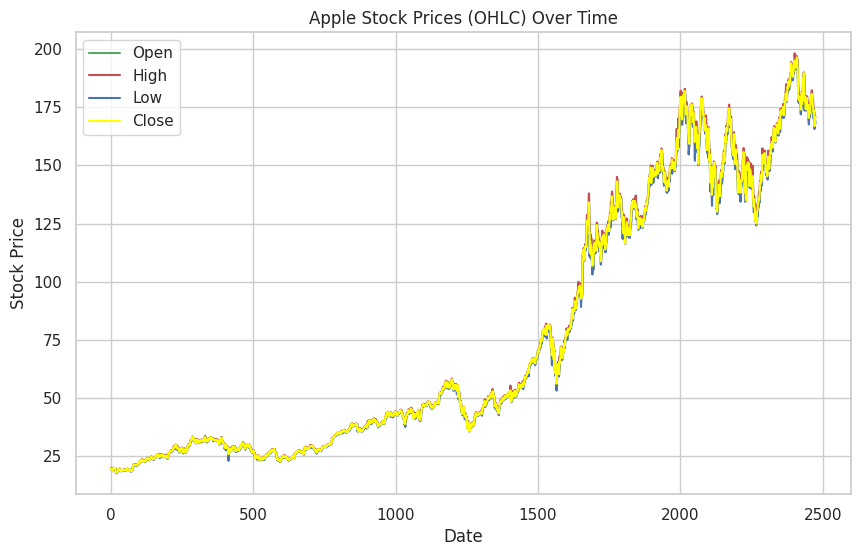

In [11]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(x=df.index, y=df['Open'], label='Open', color='g')
sns.lineplot(x=df.index, y=df['High'], label='High', color='r')
sns.lineplot(x=df.index, y=df['Low'], label='Low', color='b')
sns.lineplot(x=df.index, y=df['Close'], label='Close', color='yellow')
plt.title('Apple Stock Prices (OHLC) Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [12]:
df.index

RangeIndex(start=0, stop=2475, step=1)

In [13]:
fig=ex.bar(df,x=df.index,y=df['Volume'])
fig.show()

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [15]:
train_size=int(len(df)*0.8)
train,test=df.iloc[:train_size],df.iloc[train_size:]

In [17]:
model=ARIMA(train['Close'],order=(5,1,0))
model_fit=model.fit()

In [18]:
forecast=model_fit.forecast(steps=len(test))

In [19]:
forecast

1980    148.231796
1981    148.125591
1982    148.234453
1983    148.205506
1984    148.163007
           ...    
2470    148.167911
2471    148.167911
2472    148.167911
2473    148.167911
2474    148.167911
Name: predicted_mean, Length: 495, dtype: float64

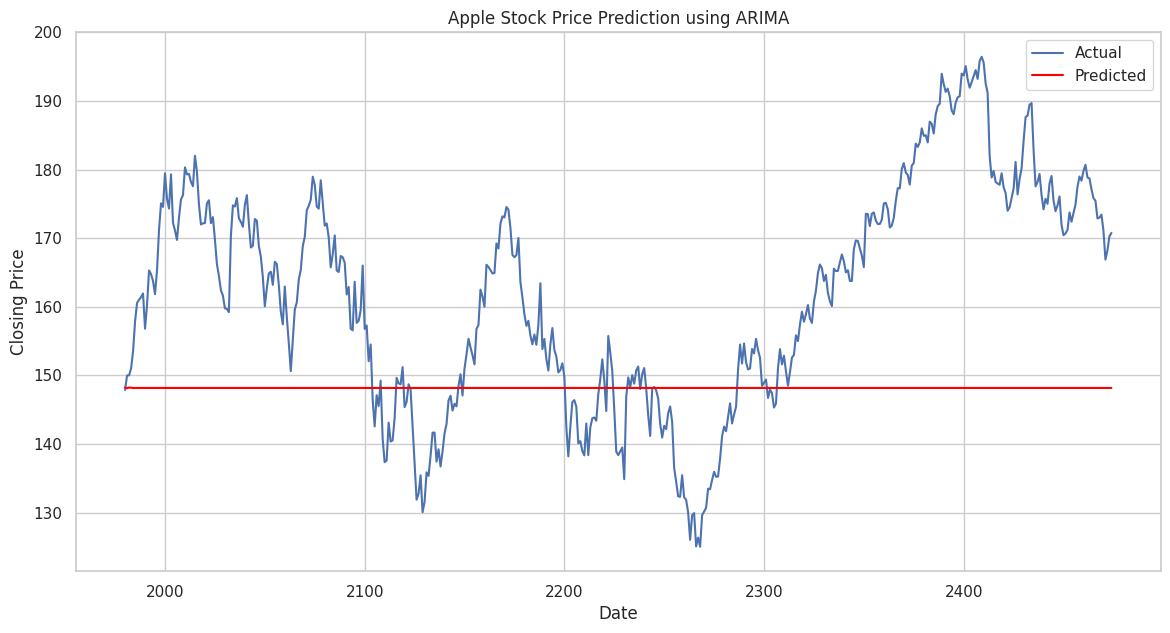

In [22]:
mse=mean_squared_error(test['Close'],forecast)
plt.figure(figsize=(14, 7))
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, forecast, color='red', label='Predicted')
plt.title('Apple Stock Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [23]:
mse

444.87468497570865